<a href="https://colab.research.google.com/github/Tranminhtuan48/pythonbasics/blob/main/Bai1(Toann).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
dataset = pd.read_csv("/content/drive/MyDrive/1000 Sales Records.csv", dtype={'Region': 'category', 'Country': 'category', 'Order Priority': 'category'})
dataset.head()

,Region,Country,Item Type,Sales Channel,Order Priority,Order Date,Order ID,Ship Date,Units Sold,Unit Price,Unit Cost,Total Revenue,Total Cost,Total Profit
0,Middle East and North Africa,Libya,Cosmetics,Offline,M,10/18/2014,686800706,10/31/2014,8446,437.20,263.33,3692591.20,2224085.18,1468506.02
1,North America,Canada,Vegetables,Online,M,11/7/2011,185941302,12/8/2011,3018,154.06,90.93,464953.08,274426.74,190526.34
2,Middle East and North Africa,Libya,Baby Food,Offline,C,10/31/2016,246222341,12/9/2016,1517,255.28,159.42,387259.76,241840.14,145419.62
3,Asia,Japan,Cereal,Offline,C,4/10/2010,161442649,5/12/2010,3322,205.70,117.11,683335.40,389039.42,294295.98
4,Sub-Saharan Africa,Chad,Fruits,Offline,H,8/16/2011,645713555,8/31/2011,9845,9.33,6.92,91853.85,68127.40,23726.45


Boxplot giúp hình dung sự phân bố của các giá trị định lượng trong một trường. Chúng cũng có giá trị để so sánh giữa các biến phân loại khác nhau hoặc xác định các ngoại lệ, nếu một trong hai biến đó tồn tại trong tập dữ liệu

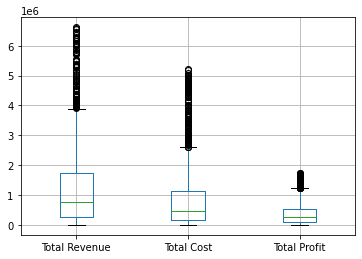

In [ ]:
dataset.boxplot(column = ["Total Revenue", "Total Cost",	"Total Profit"])

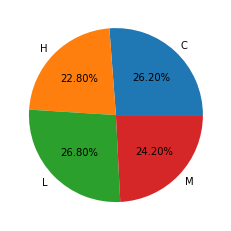

In [ ]:
r = dataset["Order Priority"]
r_categories = r.cat.categories.to_list()
r_category_counts = r.value_counts(sort=False).to_numpy()
plt.pie(r_category_counts, labels = r_categories, autopct='%1.2f%%')
plt.show()

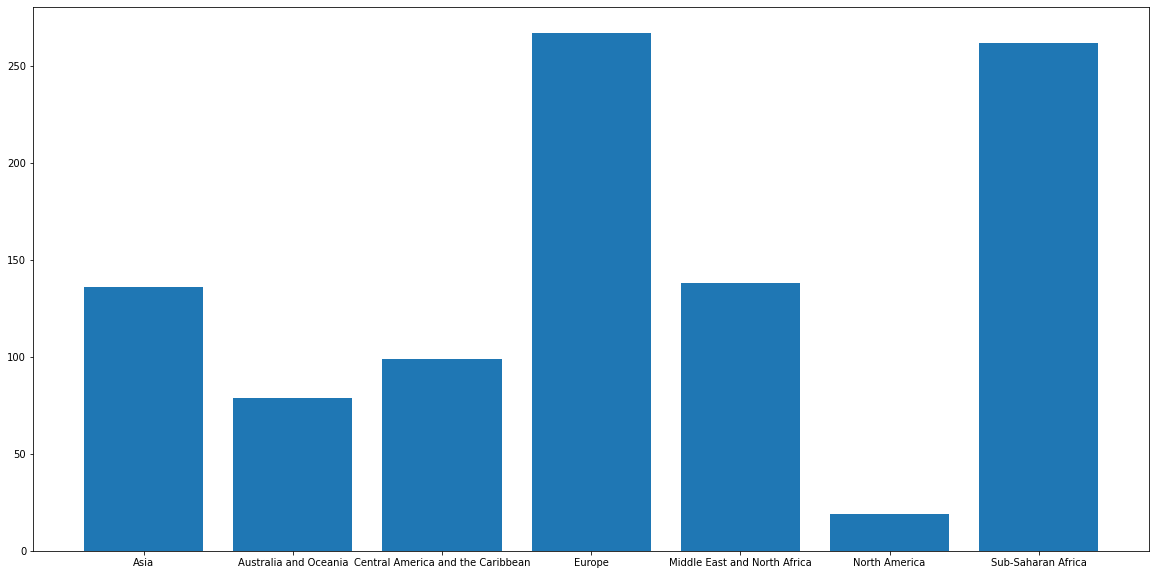

In [ ]:
r = dataset["Region"]
plt.figure(figsize = (20, 10))
r_categories = r.cat.categories.to_list()
r_category_counts = r.value_counts(sort=False).to_numpy()
plt.bar(r_categories, r_category_counts)
plt.show()

(array([ 70.,   0.,   0.,   0., 101.,  78.,   0.,   0.,   0.,  87.,   0.,
          0.,   0.,   0.,   0.,   0.,  97.,  82.,   0.,   0.,   0.,  79.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,  87.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,  75.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,  78.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,  77.,   0.,   0.,   0.,
         89.]),
 array([  6.92  ,  12.1004,  17.2808,  22.4612,  27.6416,  32.822 ,
         38.0024,  43.1828,  48.3632,  53.5436,  58.724 ,  63.9044,
         69.0848,  74.2652,  79.4456,  84.626 ,  89.8064,  94.9868,
        100.1672, 105.3476, 110.528 , 115.7084, 120.8888, 126.0692,
        131.2496, 136.43  , 141.6104, 146.7908

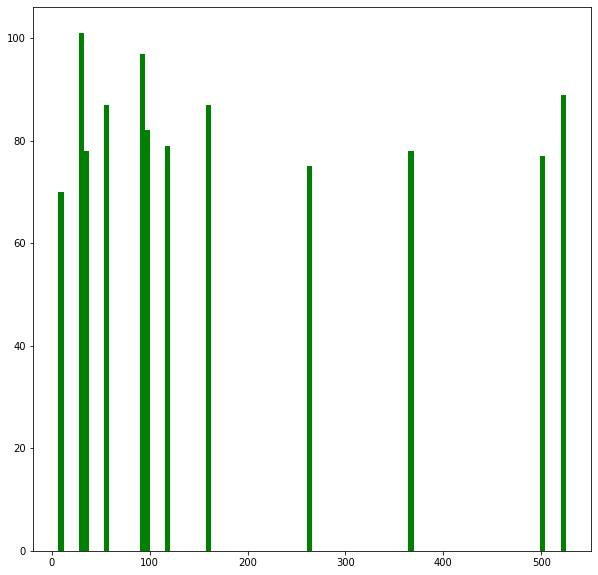

In [ ]:
uc = dataset["Unit Cost"]
plt.figure(figsize = (10, 10))
plt.hist(uc, 100, color ='green')

In [ ]:
def mean(A):
  sum = 0
  for i in A:
    sum+=i
  return sum/len(A)

def median(A):
  A.sort()
  n = len(A)
  if n % 2 == 0:
    median1 = A[n//2]
    median2 = A[n//2 - 1]
    median = (median1 + median2)/2
  else:
    median = A[n//2]
  return median

def mode(A):
  B=[]  
  for i in A:
    B.append(list(A).count(i))
  d = dict(zip(A, B))
  m = [k for (k,v) in d.items() if v == max(B)]
  return m

def variance(A):
  sum = 0
  for i in A:
    sum+=(i-mean(A))**2
  return sum/len(A)

def standard_deviation(A):
  return variance(A)**(1/2)

def average(A, w):
  temp = 0
  for i in range(len(w)):
    temp += A[i]*w[i]
  return temp/sum(w)

import numpy
import math
def weighted_avg_and_std(values, weights):
    average = numpy.average(values, weights=weights)
    variance = numpy.average((values-average)**2, weights=weights)
    return (average, math.sqrt(variance))

def quantile(a, p):
  n = len(a)
  for i in range(n-1):
    for j in range(i + 1, n):
      if (a[i] > a[j]):
        a[i], a[j] = a[j], a[i]
  i = p/100 *n
  if int(i) == i:
    return (a[int(i - 1)] + a[int(i)])/2
  else:
    return a[int(i)]

def standardization(data):
  data_norm = (data - data.min())/(data.max() - data.min())
  return data_norm

In [ ]:

mode([4,5,6,7,8,9,4])

[4]

In [ ]:
import pandas as pd
import numpy as np

In [ ]:
pd.crosstab(dataset['Region'], dataset['Item Type'])

Item Type,Baby Food,Beverages,Cereal,Clothes,Cosmetics,Fruits,Household,Meat,Office Supplies,Personal Care,Snacks,Vegetables
Region,,,,,,,,,,,,
Asia,13,17,7,7,17,8,6,9,14,15,12,11
Australia and Oceania,3,7,8,6,7,5,9,6,1,9,9,9
Central America and the Caribbean,6,7,9,8,12,6,6,10,10,9,8,8
Europe,24,28,19,22,19,14,25,12,26,23,25,30
Middle East and North Africa,13,15,11,15,7,7,6,14,13,11,11,15
North America,4,3,0,4,0,1,1,1,1,1,1,2
Sub-Saharan Africa,24,24,25,16,13,29,24,26,24,19,16,22


In [ ]:
freq_table = pd.crosstab(dataset['Item Type'], 'Tần số')
my_series = dataset['Item Type']
my_series.value_counts()
# Frequency table in proportion of species
freq_table["Tần suất"] = freq_table/len(dataset)
freq_table

col_0,Tần số,Tần suất
Item Type,,
Baby Food,87,0.087
Beverages,101,0.101
Cereal,79,0.079
Clothes,78,0.078
Cosmetics,75,0.075
Fruits,70,0.070
Household,77,0.077
Meat,78,0.078
Office Supplies,89,0.089
